In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
%matplotlib inline
import random
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("../input/cryptocurrencypricehistory/coin_Bitcoin.csv")


In [3]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
data.shape

(2991, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [6]:
data.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

dealing with datetime

In [7]:
import datetime as dt
data["Date"]=pd.to_datetime(data["Date"])
data['Date_year'] =data["Date"].dt.year
data['Date_month'] =data["Date"].dt.month
data['Date_day'] =data["Date"].dt.day
data['Date_hour'] =data["Date"].dt.hour
data['Date_minute'] =data["Date"].dt.minute
data['Date_seconde'] =data["Date"].dt.second
data.drop(["Date"], axis=1, inplace=True)

In [8]:
data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,4,29,23,59,59
1,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,4,30,23,59,59
2,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,5,1,23,59,59
3,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,5,2,23,59,59
4,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,5,3,23,59,59


In [9]:
numeric=['High', 'Low', 'Open','Close','Volume', 'Marketcap', 'Date_year','Date_month','Date_day', 'Date_minute','Date_seconde']
category=['Name','Symbol']

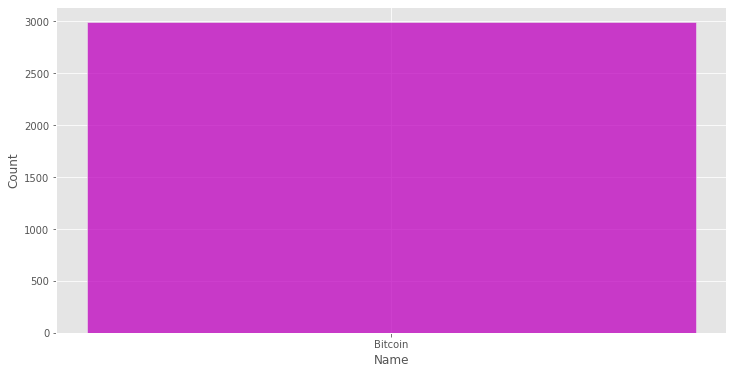

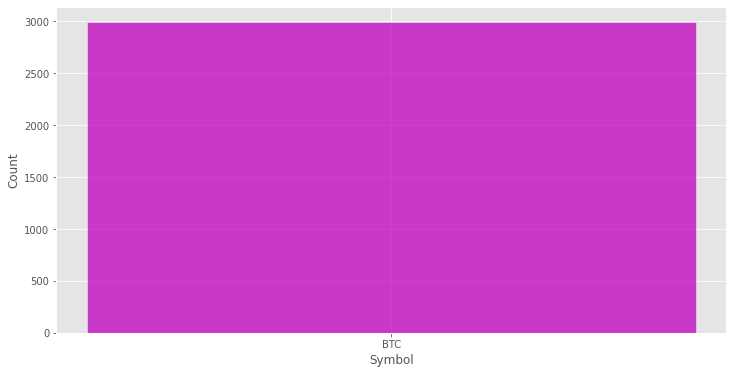

In [10]:
stl.use('ggplot')

for col in category:
    plt.figure(figsize=(12,6))
    sns.histplot(data[col], color="m")
    plt.show

# Encoding

In [11]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['Name','Symbol'])
encdata=ordenc.fit_transform(data)

In [12]:
encdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNo           2991 non-null   int64  
 1   Name          2991 non-null   int64  
 2   Symbol        2991 non-null   int64  
 3   High          2991 non-null   float64
 4   Low           2991 non-null   float64
 5   Open          2991 non-null   float64
 6   Close         2991 non-null   float64
 7   Volume        2991 non-null   float64
 8   Marketcap     2991 non-null   float64
 9   Date_year     2991 non-null   int64  
 10  Date_month    2991 non-null   int64  
 11  Date_day      2991 non-null   int64  
 12  Date_hour     2991 non-null   int64  
 13  Date_minute   2991 non-null   int64  
 14  Date_seconde  2991 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 350.6 KB


In [13]:
data.duplicated().sum()

0

In [14]:
def outlier(col):
    color = random.choice(['r', 'g', 'b'])
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

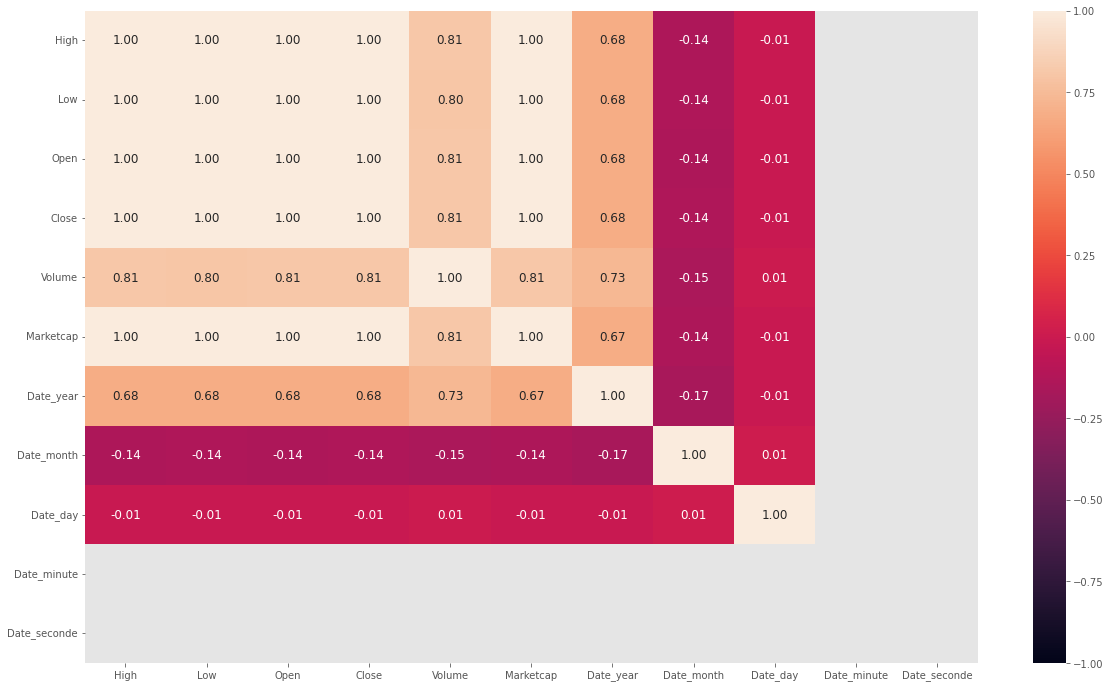

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(data[numeric].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

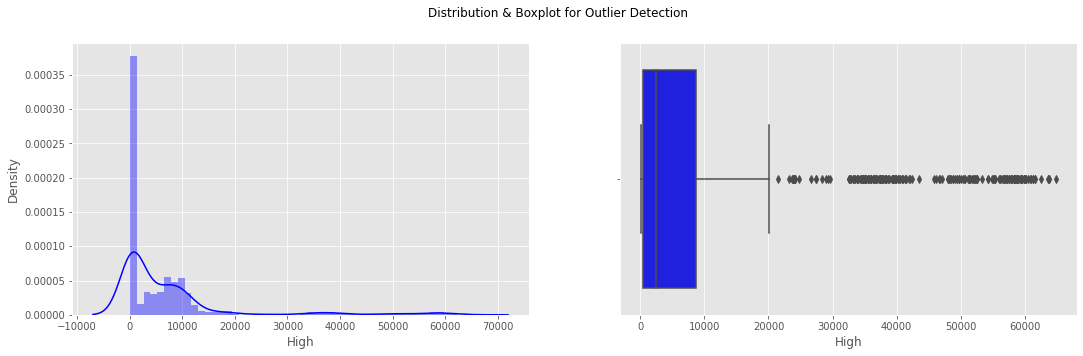

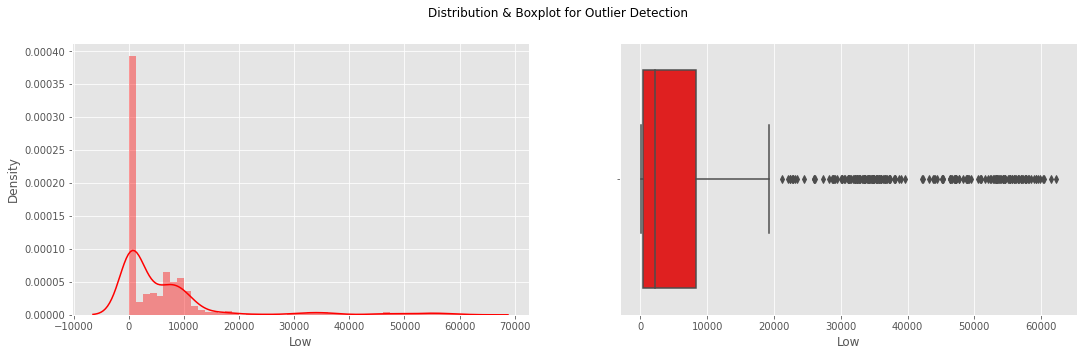

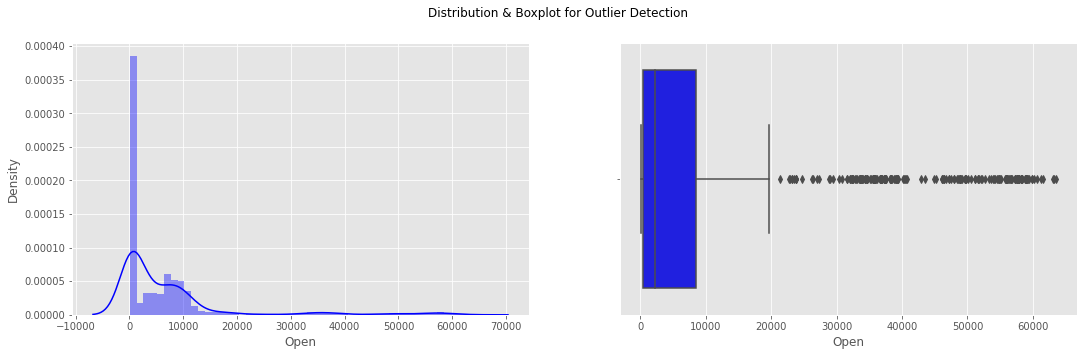

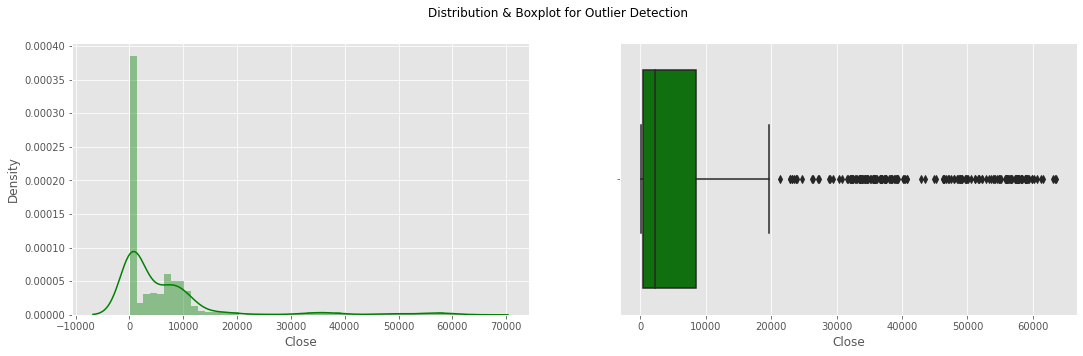

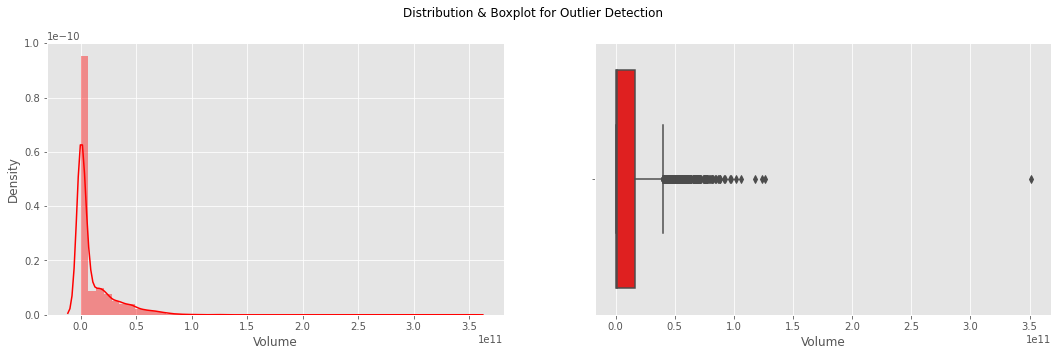

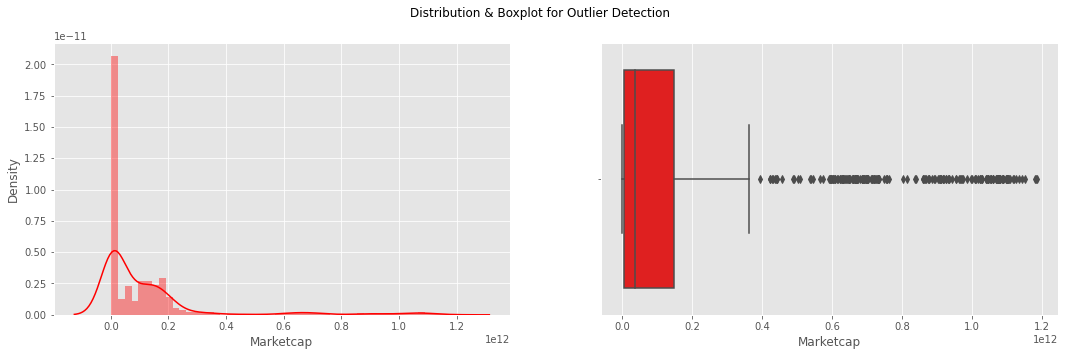

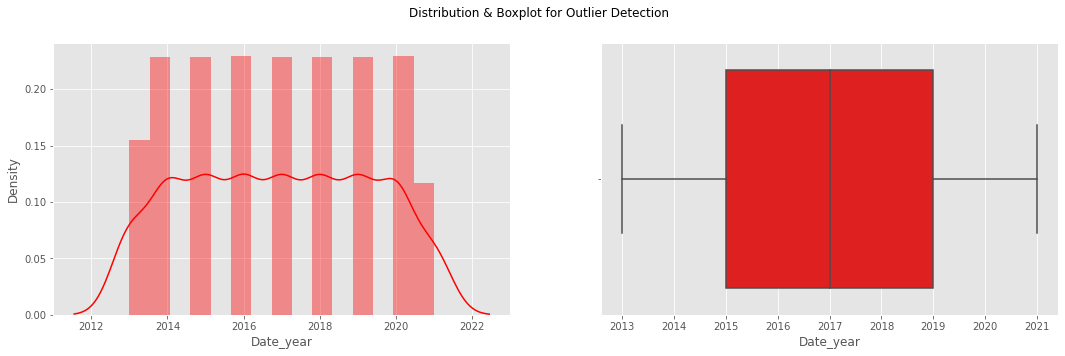

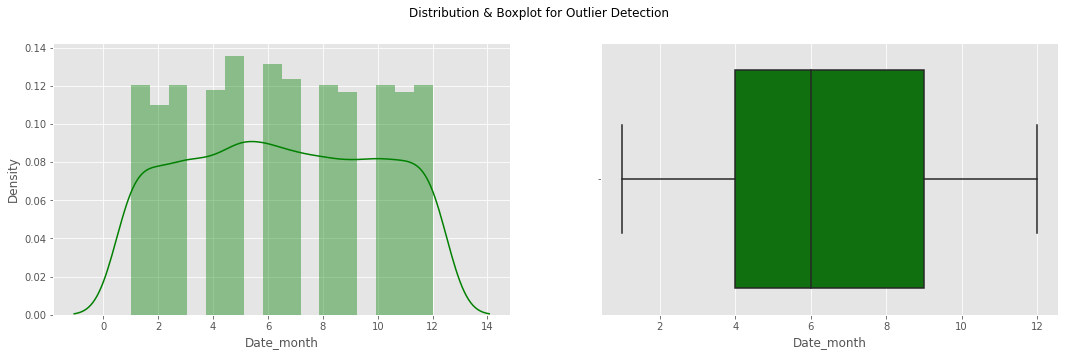

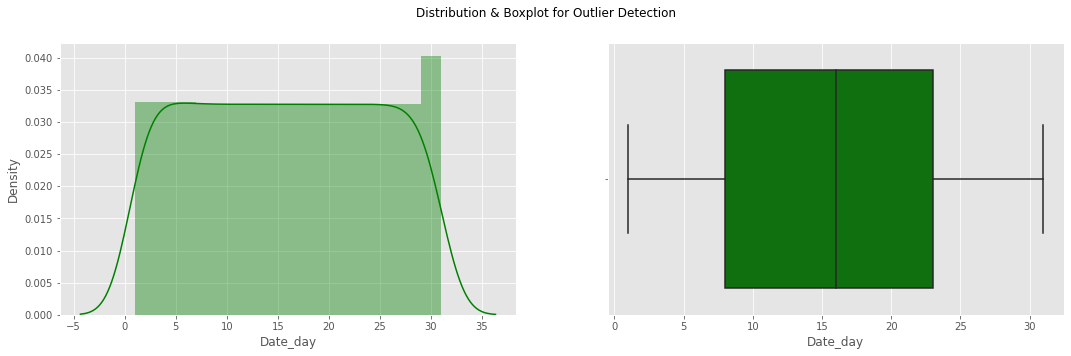

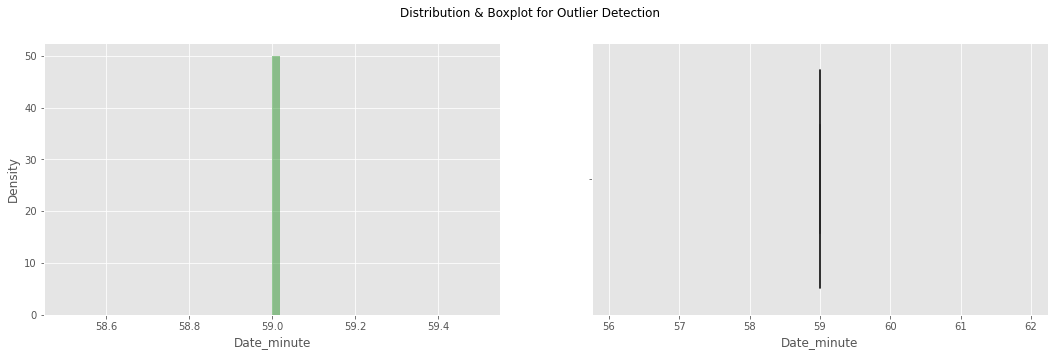

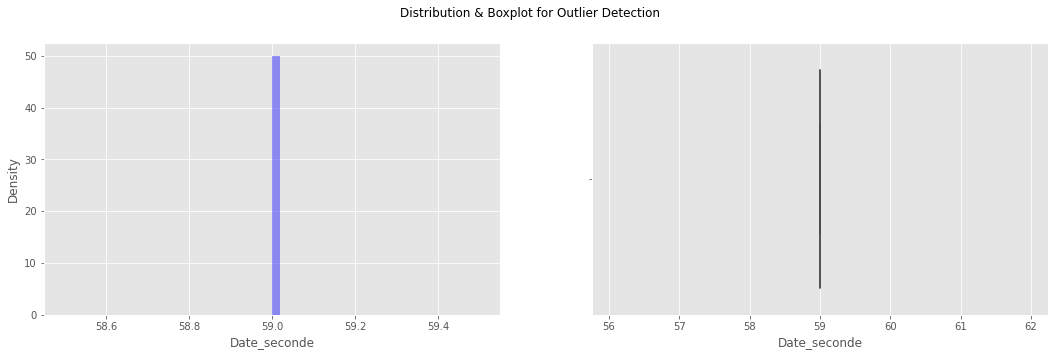

In [16]:
for i in numeric:
    outlier(data[i])

# Scaling

In [17]:
encdata.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,1,1,1,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,4,29,23,59,59
1,2,1,1,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,4,30,23,59,59
2,3,1,1,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,5,1,23,59,59
3,4,1,1,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,5,2,23,59,59
4,5,1,1,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,5,3,23,59,59


In [18]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaleddata = rs.fit_transform(encdata)
encdata = pd.DataFrame(scaleddata, columns=encdata.columns)

# Modeling

In [19]:
x= encdata.drop("Marketcap", axis=1)
y=encdata["Marketcap"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23)
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error


In [20]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=1)
tree.fit(xtrain, ytrain)
ypredtest = tree.predict(xtest)

In [21]:
mean_absolute_error(ytest, ypredtest)

0.00801930380990681

# GridSearchCV 

![](https://ichi.pro/assets/images/max/724/1*E3FOlkD7LyeTbKMoTDnwFQ.png)

In [22]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {"max_depth":(5, 8, 15, 30, 35, 50), "max_features":(0.2, 0.4, 0.6, 0.8), "min_samples_split":(2, 5, 8, 10, 20)}
Grid= GridSearchCV(estimator=tree, param_grid=hyperparameters, cv=8, scoring="neg_mean_absolute_error", n_jobs=-1)
Grid.fit(xtrain, ytrain)



GridSearchCV(cv=8, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': (5, 8, 15, 30, 35, 50),
                         'max_features': (0.2, 0.4, 0.6, 0.8),
                         'min_samples_split': (2, 5, 8, 10, 20)},
             scoring='neg_mean_absolute_error')

In [23]:
Grid.best_estimator_


DecisionTreeRegressor(max_depth=15, max_features=0.8, random_state=1)

In [24]:
Grid.best_params_

{'max_depth': 15, 'max_features': 0.8, 'min_samples_split': 2}

In [25]:
tree = DecisionTreeRegressor(max_depth=15,max_features=0.8, min_samples_split= 2, random_state=1)
tree.fit(xtrain, ytrain)
ypredd = tree.predict(xtest)

In [26]:
mean_absolute_error(ytest, ypredd)

0.007532413669230767

we notice a difference in the result 

In [27]:
pd.DataFrame(Grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006626,0.000498,0.002804,0.000362,5,0.2,2,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-0.098855,-0.109879,-0.099298,-0.091589,-0.087027,-0.107613,-0.093376,-0.069309,-0.094618,0.011992,116
1,0.005797,0.000283,0.002648,0.000129,5,0.2,5,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-0.098855,-0.109879,-0.099298,-0.139619,-0.087027,-0.107613,-0.131555,-0.069309,-0.105394,0.021214,119
2,0.005717,0.000508,0.002750,0.000295,5,0.2,8,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-0.098855,-0.109879,-0.099298,-0.105227,-0.087027,-0.107613,-0.096283,-0.134784,-0.104871,0.013167,118
3,0.005977,0.000400,0.002788,0.000145,5,0.2,10,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-0.098855,-0.109879,-0.099298,-0.105227,-0.089466,-0.122766,-0.105949,-0.134784,-0.108278,0.013477,120
4,0.005515,0.000595,0.002413,0.000444,5,0.2,20,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",-0.107921,-0.145479,-0.115927,-0.086787,-0.085629,-0.123682,-0.099699,-0.069190,-0.104289,0.022718,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.024704,0.000417,0.003151,0.000222,50,0.8,2,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-0.008129,-0.013081,-0.009316,-0.012259,-0.008307,-0.012845,-0.013652,-0.009314,-0.010863,0.002161,2
116,0.023076,0.001739,0.003050,0.000142,50,0.8,5,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-0.013048,-0.011970,-0.008558,-0.010365,-0.008310,-0.011726,-0.015960,-0.010532,-0.011309,0.002327,6
117,0.020864,0.000492,0.002991,0.000127,50,0.8,8,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-0.012125,-0.013165,-0.009780,-0.012536,-0.010231,-0.012565,-0.013355,-0.011162,-0.011865,0.001247,10
118,0.019531,0.000859,0.003037,0.000243,50,0.8,10,"{'max_depth': 50, 'max_features': 0.8, 'min_sa...",-0.014975,-0.014917,-0.010004,-0.014260,-0.010749,-0.012314,-0.016550,-0.014354,-0.013515,0.002121,18


# Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(tree, xtrain, ytrain, cv=8)
cvscore

array([0.99969001, 0.99972275, 0.99956347, 0.99945797, 0.99968468,
       0.99962025, 0.99974395, 0.99948751])

In [29]:
cvscore.mean()


0.9996213247468922

# ShuffleSplit

![](https://amueller.github.io/aml/_images/shuffle_split_cv.png)

In [30]:
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(6,test_size=0.3)
cvs=cross_val_score(tree,x,y, cv=cv)

In [31]:
cvs.mean()

0.9994551358583769

# Ensemble-Learning

In [32]:
from sklearn.ensemble import VotingClassifier

In [33]:
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

In [34]:
model1=SGDRegressor(random_state=0)
model2=KNeighborsRegressor(n_neighbors=5)
model3=DecisionTreeRegressor()
model4= VotingRegressor([('SGD',model1),
                         ('KNN',model2),('tree',DecisionTreeRegressor())
                         ])
for model in (model1,model2,model3, model4):
    model.fit(xtrain,ytrain)
    print(model.__class__.__name__, model.score(xtest,ytest))
    

SGDRegressor 0.9987344167340045
KNeighborsRegressor 0.998685906479463
DecisionTreeRegressor 0.9997185688025686
VotingRegressor 0.9994773992760356


# Bagging

In [35]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
model =BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9998936072562888

best score ever

**Thankyou* for reading *